In [47]:
import copy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  

from dim_est.datasets.data_generation import make_data_generator
from dim_est.run.run_dsib_single_experiment import merge_with_validation
from dim_est.config.dataset_defaults import DATASET_DEFAULTS 

import matplotlib as mpl
import matplotlib.pyplot as plt

# Global defaults for entire notebook
mpl.rcParams.update({
    "figure.figsize": (5, 5),
    "figure.dpi": 150,
    "font.size": 14,
    "axes.labelsize": 16,
    "axes.titlesize": 16,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
})

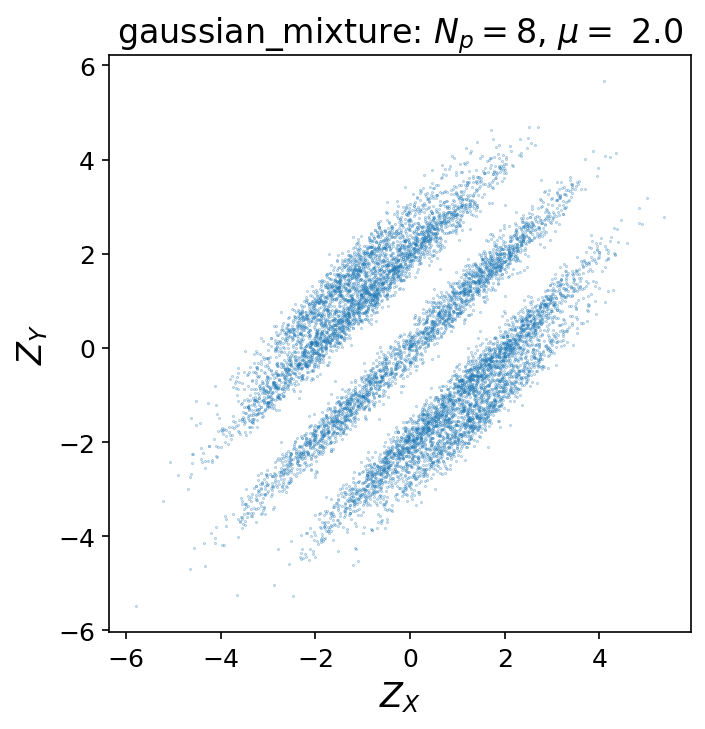

In [66]:
dataset_type = "gaussian_mixture"
n_peaks = 8 
mu =2.0
mi_bits_peak = 2.0
dataset_overrides = dict(latent=dict(n_peaks=n_peaks, mi_bits_peak=mi_bits_peak, mu= mu, sig=1.0), transform = dict(mode='identity', observe_dim_x =None, observe_dim_y =None))
ds_defaults = copy.deepcopy(DATASET_DEFAULTS[dataset_type])
ds_cfg = merge_with_validation(ds_defaults, dataset_overrides, "dataset overrides")
data_generator = make_data_generator(dataset_type, ds_cfg, device = 'cpu')

zx, zy = data_generator(10000)

fig, ax = plt.subplots(dpi=150)
ax.scatter(zx, zy, alpha=0.5, s=0.1)
ax.set_xlabel(r"$Z_X$")
ax.set_ylabel(r"$Z_Y$")
ax.set_title(rf'{dataset_type}: $N_p = ${n_peaks}, $\mu = $ {mu}')
plt.show()

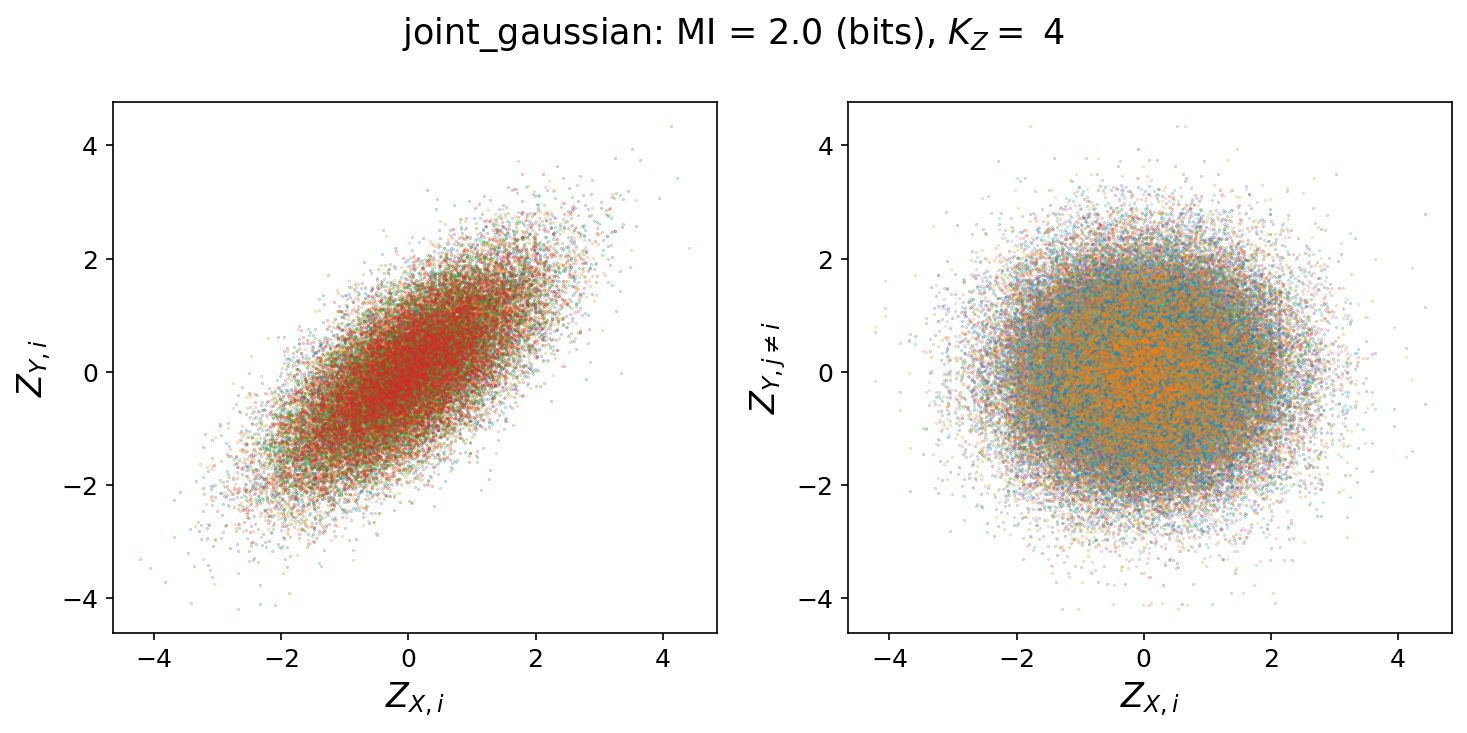

In [67]:
dataset_type = "joint_gaussian"
latent_dim = 4
mi_bits = 2.0
dataset_overrides = dict(latent=dict(latent_dim=latent_dim, mi_bits=mi_bits), transform = dict(mode='identity', observe_dim_x =None, observe_dim_y =None))
ds_defaults = copy.deepcopy(DATASET_DEFAULTS[dataset_type])
ds_cfg = merge_with_validation(ds_defaults, dataset_overrides, "dataset overrides")
data_generator = make_data_generator(dataset_type, ds_cfg, device = 'cpu')

zx, zy = data_generator(10000)

fig, axes = plt.subplots(1,2, figsize=(10,5))

ax=axes[0]
for i in range(latent_dim):
    ax.scatter(zx[:, i], zy[:, i], alpha=0.5, s=0.1)# c= '#1f77b4'
    
ax.set_xlabel(r"$Z_{X, i}$")
ax.set_ylabel(r"$Z_{Y, i}$")

ax =axes[1]
for i in range(latent_dim):
    for j in range(latent_dim):
        if i!=j:
            ax.scatter(zx[:, i], zy[:, j], alpha=0.5, s=0.1)
    
ax.set_xlabel(r"$Z_{X, i}$")
ax.set_ylabel(r"$Z_{Y, j\ne i}$")

fig.suptitle(rf'{dataset_type}: MI = {mi_bits} (bits), $K_Z = $ {latent_dim}')
plt.tight_layout()
plt.show()

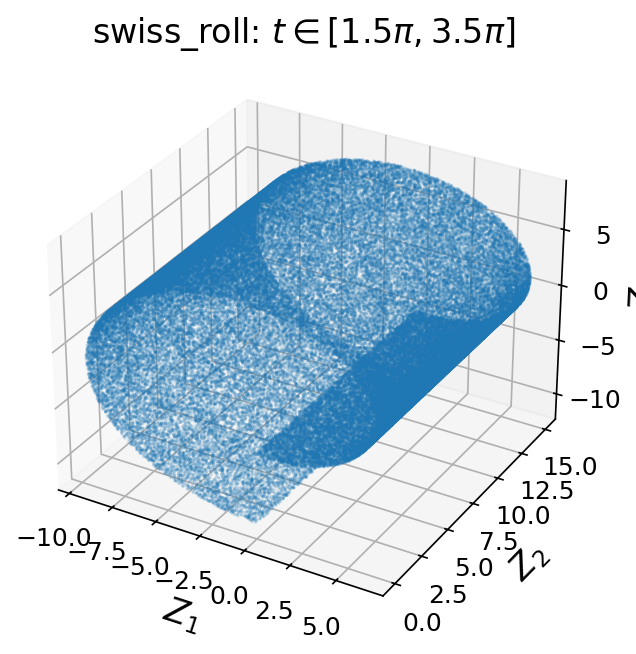

In [68]:
dataset_type = "swiss_roll"
t_min = 1.5 # kept fixed in the sims
t_max = 3.5
dataset_overrides = dict(latent=dict(t_min_pi_units=t_min, t_max_pi_units=t_max), transform = dict(mode='identity', observe_dim_x =None, observe_dim_y =None))
ds_defaults = copy.deepcopy(DATASET_DEFAULTS[dataset_type])
ds_cfg = merge_with_validation(ds_defaults, dataset_overrides, "dataset overrides")
data_generator = make_data_generator(dataset_type, ds_cfg, device = 'cpu')

zx, zy = data_generator(100000)

fig = plt.figure(figsize=(5, 5))
z_np = zx
x, y, t = z_np[:, 0], z_np[:, 1], z_np[:, 2]

ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, t, s=0.3, alpha=0.2)
ax.set_xlabel(r"$Z_1$")
ax.set_ylabel(r"$Z_2$")
ax.set_zlabel(r"$Z_3$")
ax.set_title( rf"{dataset_type}: $t \in [{t_min}\pi, {t_max}\pi]$")
plt.show()

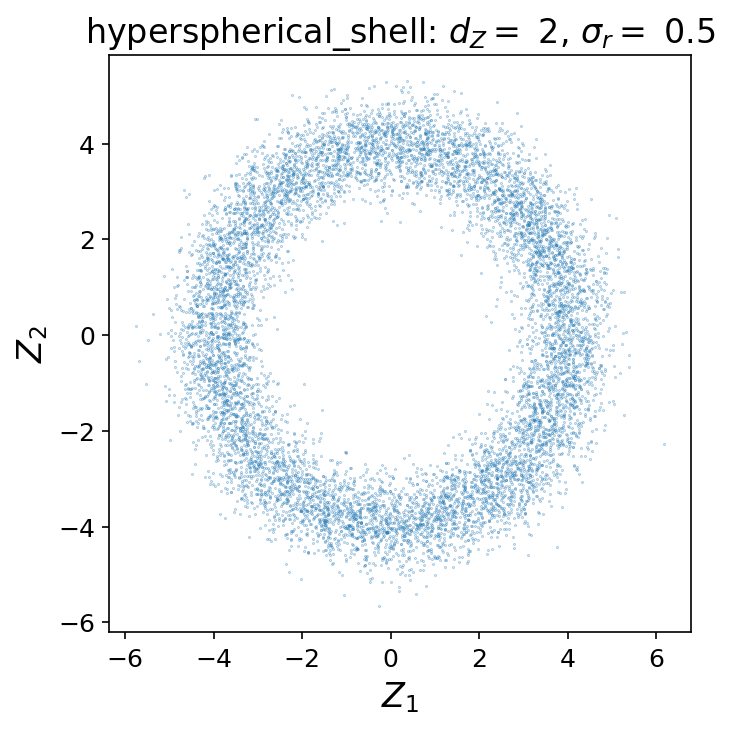

In [69]:
dataset_type = "hyperspherical_shell"
latent_dim = 2
radial_std = 0.5
dataset_overrides = dict(latent=dict(latent_dim=latent_dim, radial_std=radial_std), transform = dict(mode='identity', observe_dim_x =None, observe_dim_y =None))
ds_defaults = copy.deepcopy(DATASET_DEFAULTS[dataset_type])
ds_cfg = merge_with_validation(ds_defaults, dataset_overrides, "dataset overrides")
data_generator = make_data_generator(dataset_type, ds_cfg, device = 'cpu')


zx, zy = data_generator(10000)

fig, ax = plt.subplots()
z_np = zx
ax.scatter(z_np[:, 0], z_np[:, 1], alpha=0.5, s=0.1)   
ax.set_xlabel(r"$Z_1$")
ax.set_ylabel(r"$Z_2$")
ax.set_title(rf'{dataset_type}: $d_Z =$ {latent_dim}, $\sigma_r = $ {radial_std}')
plt.show()

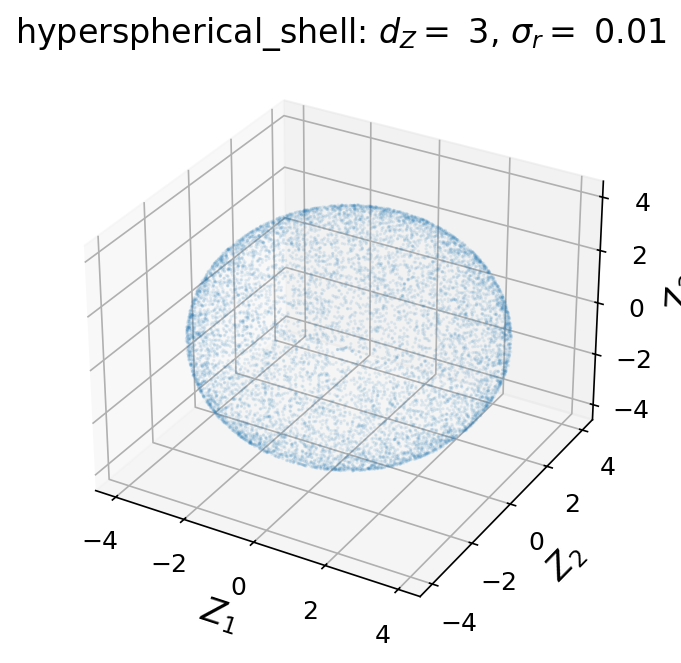

In [70]:
dataset_type = "hyperspherical_shell"
latent_dim=3
radial_std = 0.01
dataset_overrides = dict(latent=dict(latent_dim=latent_dim, radial_std=radial_std), transform = dict(mode='identity', observe_dim_x =None, observe_dim_y =None))
ds_defaults = copy.deepcopy(DATASET_DEFAULTS[dataset_type])
ds_cfg = merge_with_validation(ds_defaults, dataset_overrides, "dataset overrides")
data_generator = make_data_generator(dataset_type, ds_cfg, device = 'cpu')

zx, zy = data_generator(10000)

fig = plt.figure(figsize=(5, 5))
z_np = zx
x, y, z = z_np[:, 0], z_np[:, 1], z_np[:, 2]

ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, s=0.3, alpha=0.1)
ax.set_xlabel(r"$Z_1$")
ax.set_ylabel(r"$Z_2$")
ax.set_zlabel(r"$Z_3$")
ax.set_title(rf'{dataset_type}: $d_Z =$ {latent_dim}, $\sigma_r = $ {radial_std}')
plt.show()